In [13]:
import gensim
import joblib
import jieba
import numpy as np
import pandas as pd

# 加载模型
classifier = joblib.load('./model/logistic_regression_classifier.pkl')
word2vec_model = gensim.models.Word2Vec.load('./model/word2vec_model.model')

# 预处理函数
def preprocess_text(text):
    seg_list = jieba.lcut(text)
    return [word for word in seg_list if word in word2vec_model.wv]

# 文本转向量函数
def text_to_vector(text):
    words = preprocess_text(text)
    if words:
        return np.mean([word2vec_model.wv[word] for word in words if word in word2vec_model.wv], axis=0)
    else:
        return np.array([])

# 情感评分预测函数
def predict_sentiment_score(text):
    vector = text_to_vector(text)
    if vector.size:
        probabilities = classifier.predict_proba([vector])[0]
        return probabilities[1]  # 返回正面情感的概率作为评分
    else:
        return None



df = pd.read_csv('data.csv',encoding='utf-8',names=['cols'])
for i in range(len(df)):
    if '香格里拉' in str(df['cols'][i]) or '拉萨' in str(df['cols'][i]):
        df.drop(i,inplace=True)
df.to_csv('data.csv',encoding='utf-8',index=False)
df.reset_index(inplace=True)
df['sentiment_score'] = df['cols'].apply(predict_sentiment_score)
# 添加情绪列
bins = [0, 0.33, 0.67, 1]
labels = ['负', '中', '正']
df['情绪'] = pd.cut(df['sentiment_score'], bins=bins, labels=labels, right=False)
df['sentiment_score'] = df['sentiment_score']
df.to_csv(f'情感分析完毕.csv', encoding='utf-8',index=False)
df

,index,cols,sentiment_score,情绪
0,0,我们在今年十月份去了普达措国家公园，那里的风景非常美丽而且管理得很好。您可以在独克宗广场的迪...,0.789002,正
1,2,还有人说：“我在冬天去的，所以公园被雪覆盖着。温度适宜，略高于摄氏零度。人们在雪中玩耍，动物...,0.090871,负
2,3,他们评价道：“享受高海拔植被，当然还有整个令人陶醉宁静的童话世界！确实是一个真正的生态圣地！”,0.785127,正
3,4,去那里观赏美丽的自然风景并散步几个小时是一次绝佳的选择。如果您没有自己的车，每天早上9点30...,0.398934,中
4,5,有人说：“普达措国家公园，我们到得很晚，大约下午4点，我们先乘了一辆巴士，导游用中文详细解说...,0.719994,正
...,...,...,...,...
4337,4902,真是个惊喜！我和家人在那里度过了一段美妙的时光。山脉和湖泊的壮丽景色让我们感觉仿佛置身仙境。...,0.956969,正
4338,4903,这是我在Pudacuo国家公园度过的最美好的时光。湖水湛蓝清澈，山峦绵延起伏，仿佛走进了仙境...,0.796323,正
4339,4904,这个地方太美了！湖泊的颜色如此清澈透明，周围的山峦环绕，真是一处天然的仙境。来到普达措国家公...,0.699616,正
4340,4905,该国家公园环境清幽，湖泊和山峰交相辉映，美不胜收。空气清新，适宜徒步和欣赏大自然的美景。非常...,0.948200,正


In [5]:
import pandas as pd
df = pd.read_csv('data.csv',encoding='utf-8',names=['cols'])
df

,cols
0,我们在今年十月份去了普达措国家公园，那里的风景非常美丽而且管理得很好。您可以在独克宗广场的迪...
1,有人评论说：“这是一个真正的旅游陷阱。是的，那里很漂亮，但如果你从丽江或大理乘巴士去，你会看...
2,还有人说：“我在冬天去的，所以公园被雪覆盖着。温度适宜，略高于摄氏零度。人们在雪中玩耍，动物...
3,他们评价道：“享受高海拔植被，当然还有整个令人陶醉宁静的童话世界！确实是一个真正的生态圣地！”
4,去那里观赏美丽的自然风景并散步几个小时是一次绝佳的选择。如果您没有自己的车，每天早上9点30...
...,...
4904,真是个惊喜！我和家人在那里度过了一段美妙的时光。山脉和湖泊的壮丽景色让我们感觉仿佛置身仙境。...
4905,这是我在Pudacuo国家公园度过的最美好的时光。湖水湛蓝清澈，山峦绵延起伏，仿佛走进了仙境...
4906,这个地方太美了！湖泊的颜色如此清澈透明，周围的山峦环绕，真是一处天然的仙境。来到普达措国家公...
4907,该国家公园环境清幽，湖泊和山峰交相辉映，美不胜收。空气清新，适宜徒步和欣赏大自然的美景。非常...


C:\Users\LHB\AppData\Local\Temp\ipykernel_39616\3056717942.py:11: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  stopwords = pd.read_csv('stopwords.txt',quoting=3, names=['stopword'],error_bad_lines=False)
b'Skipping line 12: expected 1 fields, saw 2\n'


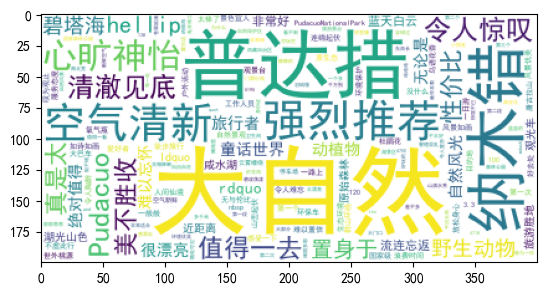

In [17]:
# 导入基本库
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
import jieba

def fenci():
    # 获取停用词
    stopwords = pd.read_csv('stopwords.txt',quoting=3, names=['stopword'],error_bad_lines=False)
    # 获取手动指定关键词
    keyswords = pd.read_csv('手动指定匹配词语.txt', names=['keys'])
    keyswords = keyswords['keys'].tolist()

    # 处理df为列表
    content = df['cols'].tolist()
    # 正式开始分词
    segment = []
    for line in content:
        try:
            segs = jieba.lcut(line) # 对每条数据进行分词
            # 匹配手动指定的关键词
            for key in keyswords:
                if key in line and len(key) >2 :
                    segment.append(key)
                    continue
            # # 加入jieba切分的关键词
            # for seg in segs:
            #     # 只有长度大于1的字符并且不能为空格换行等数据才为有效的分词
            #     if len(seg) > 2 and seg!='\r\n':
            #         segment.append(seg)
        except:
            continue
    # 存储原始的分词结果
    words_df = pd.DataFrame({'segment':segment})
    # 去除停用词
    # words_df = words_df[~words_df.segment.isin(stopwords.stopword)]
    # 统计词频
    words_stat = words_df.groupby(by='segment')['segment'].agg({('计数','count')})
    words_stat = words_stat.reset_index().sort_values(by=['计数'],ascending=False)
    words_stat.to_csv('词频结果2.csv')

    from wordcloud import WordCloud # 词云包
    wordcloud = WordCloud(font_path='simhei.ttf', background_color='white', max_font_size=80)
    # 统计频率最高的1000个词语
    word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
    # 对词语进行训练
    wordcloud = wordcloud.fit_words(word_frequence)
    # 绘制词云图
    plt.imshow(wordcloud)
    plt.savefig('词云图.png')
    

if __name__=='__main__':
    fenci()